In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



In [2]:
#pip install wordcloud

In [3]:
df1 = pd.read_csv("/Users/pablocamacho/Library/Mobile Documents/com~apple~CloudDocs/IE/Term 3/Capstone/Data/EDOS/edos_labelled_aggregated (1).csv")
df2 = pd.read_csv("/Users/pablocamacho/Library/Mobile Documents/com~apple~CloudDocs/IE/Term 3/Capstone/Data/EDOS/edos_labelled_individual_annotations (1).csv")

df1

,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,none,none,dev
1,sexism2022_english-16993,"Then, she's a keeper. 😉",not sexist,none,none,train
2,sexism2022_english-13149,This is like the Metallica video where the poo...,not sexist,none,none,train
3,sexism2022_english-13021,woman?,not sexist,none,none,train
4,sexism2022_english-966,I bet she wished she had a gun,not sexist,none,none,dev
...,...,...,...,...,...,...
19995,sexism2022_english-5228,girls really get fucked almost every weekend ?,not sexist,none,none,train
19996,sexism2022_english-10140,The hatred for moslems are Reasonable and Just...,not sexist,none,none,train
19997,sexism2022_english-9726,Now this is a woman who gets it. 👆,not sexist,none,none,train
19998,sexism2022_english-13365,“American Idol” finalist [USER] said nothing i...,not sexist,none,none,train


In [4]:
df2

,rewire_id,text,annotator,label_sexist,label_category,label_vector,split
0,sexism2022_english-0,[USER] I wonder what keeps that witch looking ...,17,sexist,2. derogation,2.2 aggressive and emotive attacks,train
1,sexism2022_english-0,[USER] I wonder what keeps that witch looking ...,2,sexist,2. derogation,2.2 aggressive and emotive attacks,train
2,sexism2022_english-0,[USER] I wonder what keeps that witch looking ...,6,not sexist,none,none,train
3,sexism2022_english-1,"What do you guys think about female ""incels""? ...",17,not sexist,none,none,train
4,sexism2022_english-1,"What do you guys think about female ""incels""? ...",15,not sexist,none,none,train
...,...,...,...,...,...,...,...
59995,sexism2022_english-9998,"Since 1973, America has sanctioned the murder ...",2,sexist,4. prejudiced discussions,4.2 supporting systemic discrimination against...,test
59996,sexism2022_english-9998,"Since 1973, America has sanctioned the murder ...",16,not sexist,none,none,test
59997,sexism2022_english-9999,Laura Bates Lol she looks like she'd suck the ...,2,sexist,2. derogation,2.2 aggressive and emotive attacks,train
59998,sexism2022_english-9999,Laura Bates Lol she looks like she'd suck the ...,16,not sexist,none,none,train


In [5]:
print(df1.columns)
print(df2.columns)

Index(['rewire_id', 'text', 'label_sexist', 'label_category', 'label_vector',
       'split'],
      dtype='object')
Index(['rewire_id', 'text', 'annotator', 'label_sexist', 'label_category',
       'label_vector', 'split'],
      dtype='object')


## EDA df1

In [6]:
df1

,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,none,none,dev
1,sexism2022_english-16993,"Then, she's a keeper. 😉",not sexist,none,none,train
2,sexism2022_english-13149,This is like the Metallica video where the poo...,not sexist,none,none,train
3,sexism2022_english-13021,woman?,not sexist,none,none,train
4,sexism2022_english-966,I bet she wished she had a gun,not sexist,none,none,dev
...,...,...,...,...,...,...
19995,sexism2022_english-5228,girls really get fucked almost every weekend ?,not sexist,none,none,train
19996,sexism2022_english-10140,The hatred for moslems are Reasonable and Just...,not sexist,none,none,train
19997,sexism2022_english-9726,Now this is a woman who gets it. 👆,not sexist,none,none,train
19998,sexism2022_english-13365,“American Idol” finalist [USER] said nothing i...,not sexist,none,none,train


In [7]:
df1.shape

(20000, 6)

In [8]:
#Count unique text

print(df1.text.nunique()/df1.shape[0])


1.0


In [9]:
df1.columns

Index(['rewire_id', 'text', 'label_sexist', 'label_category', 'label_vector',
       'split'],
      dtype='object')

In [10]:
#see diferent values of label_sexist
print(df1.label_sexist.unique())

['not sexist' 'sexist']


Axes(0.22375,0.11;0.5775x0.77)


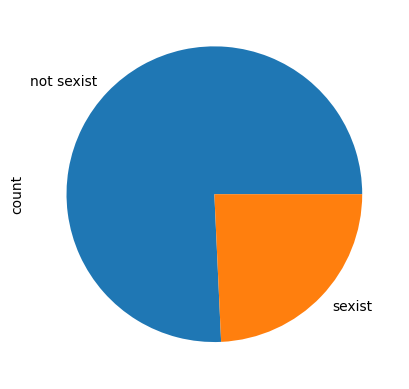

In [11]:
#pie chart of the values by each label_sexist label
print(df1.label_sexist.value_counts().plot(kind='pie'))


In [12]:
#see diferent values of label_category
print(df1.label_category.unique())



['none' '3. animosity' '2. derogation' '4. prejudiced discussions'
 '1. threats, plans to harm and incitement']


Axes(0.22375,0.11;0.5775x0.77)


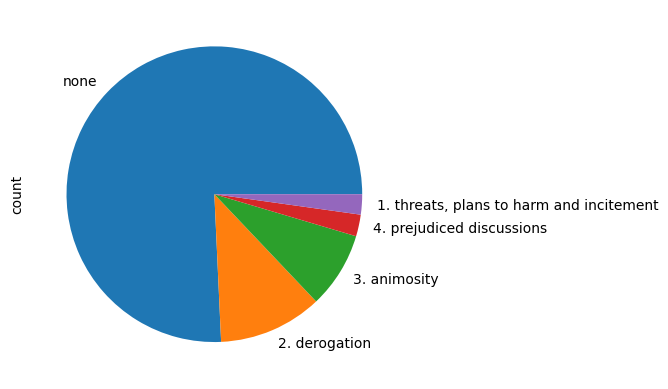

In [13]:
#pie chart the values of label_category
print(df1.label_category.value_counts().plot(kind='pie'))


In [14]:
#give me 5 examples of text per label_category
df1.groupby('label_category').apply(lambda x: x.sample(n=5))[['label_category','text']].reset_index(drop=True)



/var/folders/0z/4yrpt4m15ps8kzs2ljkgk40r0000gn/T/ipykernel_9263/1324751956.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1.groupby('label_category').apply(lambda x: x.sample(n=5))[['label_category','text']].reset_index(drop=True)


,label_category,text
0,"1. threats, plans to harm and incitement","Holy shit, I’m reading some shit on your other..."
1,"1. threats, plans to harm and incitement","Western #Feminists who chant ""Allahu Akbar!"" d..."
2,"1. threats, plans to harm and incitement",Should have given her a taste of equality and ...
3,"1. threats, plans to harm and incitement",Too good for her. I suggest dieselboarding.
4,"1. threats, plans to harm and incitement",you bring in immigrants who do nothing but hat...
5,2. derogation,"show her that your higher value then her bf, w..."
6,2. derogation,this bitch was giving him guff in the movie.. ...
7,2. derogation,only men with balls will survive jewish persec...
8,2. derogation,Women should not vote! They are too emotional ...
9,2. derogation,Colombian women and others do all that abd mor...


In [15]:
# different values of label_vector
print(df1.label_vector.unique())

['none' '3.3 backhanded gendered compliments'
 '2.3 dehumanising attacks & overt sexual objectification'
 '2.1 descriptive attacks' '2.2 aggressive and emotive attacks'
 '4.2 supporting systemic discrimination against women as a group'
 '1.2 incitement and encouragement of harm'
 '4.1 supporting mistreatment of individual women'
 '3.2 immutable gender differences and gender stereotypes'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '1.1 threats of harm'
 '3.4 condescending explanations or unwelcome advice']


In [16]:
#table the values of label_vector
print(df1.label_vector.value_counts())



label_vector
none                                                               15146
2.1 descriptive attacks                                             1024
2.2 aggressive and emotive attacks                                   961
3.1 casual use of gendered slurs, profanities, and insults           910
3.2 immutable gender differences and gender stereotypes              596
4.2 supporting systemic discrimination against women as a group      368
1.2 incitement and encouragement of harm                             363
2.3 dehumanising attacks & overt sexual objectification              286
4.1 supporting mistreatment of individual women                      107
3.3 backhanded gendered compliments                                   91
1.1 threats of harm                                                   80
3.4 condescending explanations or unwelcome advice                    68
Name: count, dtype: int64


In [17]:
df1.groupby(['label_category','label_vector']).apply(lambda x: x.sample(n=5))[['label_category','label_vector','text']].reset_index(drop=True)



/var/folders/0z/4yrpt4m15ps8kzs2ljkgk40r0000gn/T/ipykernel_9263/872712867.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1.groupby(['label_category','label_vector']).apply(lambda x: x.sample(n=5))[['label_category','label_vector','text']].reset_index(drop=True)


,label_category,label_vector,text
0,"1. threats, plans to harm and incitement",1.1 threats of harm,And women are like the printer with all the pa...
1,"1. threats, plans to harm and incitement",1.1 threats of harm,I don't care if she doesn't care. If she tries...
2,"1. threats, plans to harm and incitement",1.1 threats of harm,If Laura Loomer talked to me I would consider ...
3,"1. threats, plans to harm and incitement",1.1 threats of harm,well if i was there she wouldn't be able to ta...
4,"1. threats, plans to harm and incitement",1.1 threats of harm,This whore deserves to be shot to death. Women...
5,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm,My wife had a red face when she realised she h...
6,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm,Most women like that deserved to be knocked ar...
7,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm,Fucking shoot her.
8,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm,Oh the dirt he must have on this corrupt old h...
9,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm,a dog will look you in the eye and do your bid...


In [18]:
#distribuition of number of words per text
print(df1['text'].apply(lambda x: len(x.split())).describe())


count    20000.000000
mean        23.309600
std         11.709825
min          1.000000
25%         14.000000
50%         22.000000
75%         32.000000
max         58.000000
Name: text, dtype: float64


Axes(0.125,0.11;0.775x0.77)


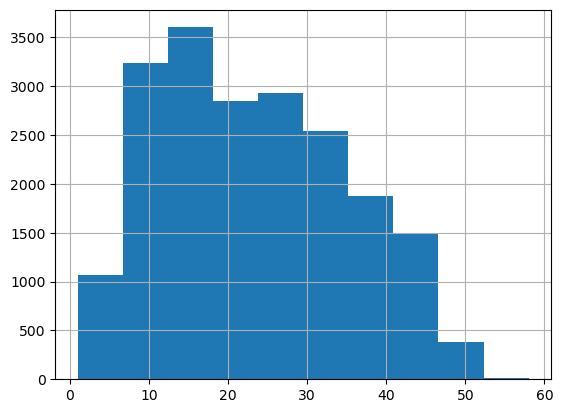

In [19]:
#graph distribuition of number of words per text
print(df1['text'].apply(lambda x: len(x.split())).hist())




In [20]:
#make all words lowercase in the text column
df1['text'] = df1['text'].str.lower()

In [21]:
#help me remove stop words from the text column
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df1['text'] = df1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))



In [22]:
remove = ['The','[URL]','[url]','[user]']

In [23]:
    #remove words in the remove list from the text column

df1['text'] = df1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in remove]))
df1['text'] = df1['text'].str.replace(r'[^\w\s]','')


<Axes: xlabel='text'>

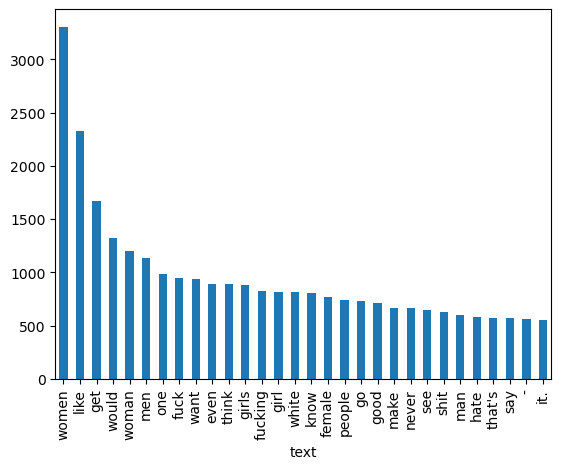

In [24]:
#What are the most used words in the text column, make a word cloud
words = df1['text'].apply(lambda x: x.split()).explode().value_counts().head(30)

words.plot(kind='bar')

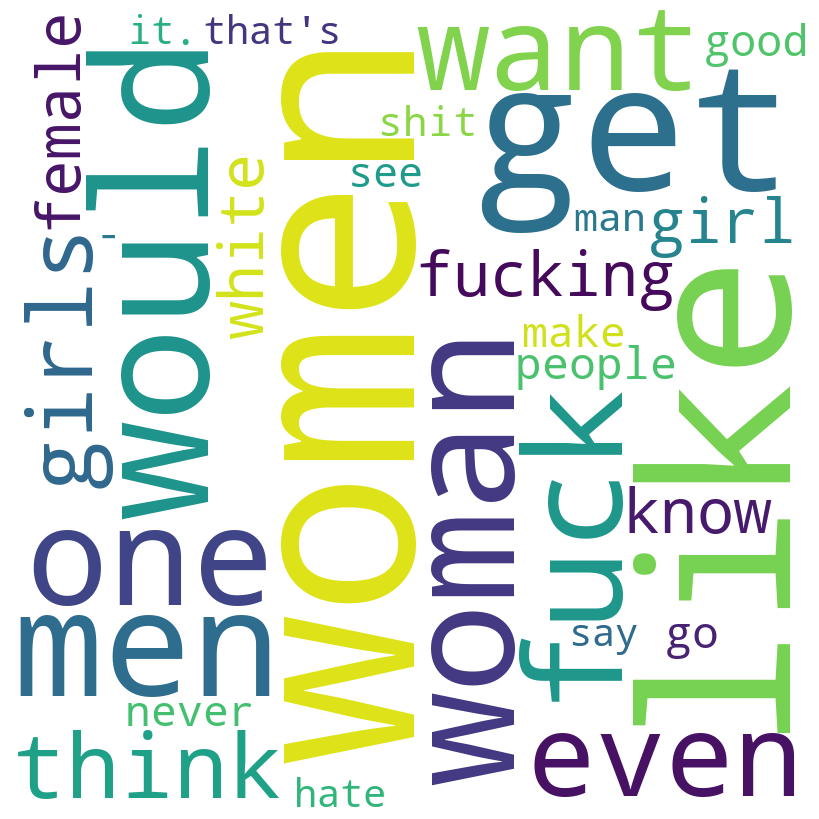

In [25]:
#make a wordcloud of the words pandas series
words = df1['text'].apply(lambda x: x.split()).explode().value_counts().head(30)

wordcloud = WordCloud(width = 800, height = 800, background_color='white').generate_from_frequencies(words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



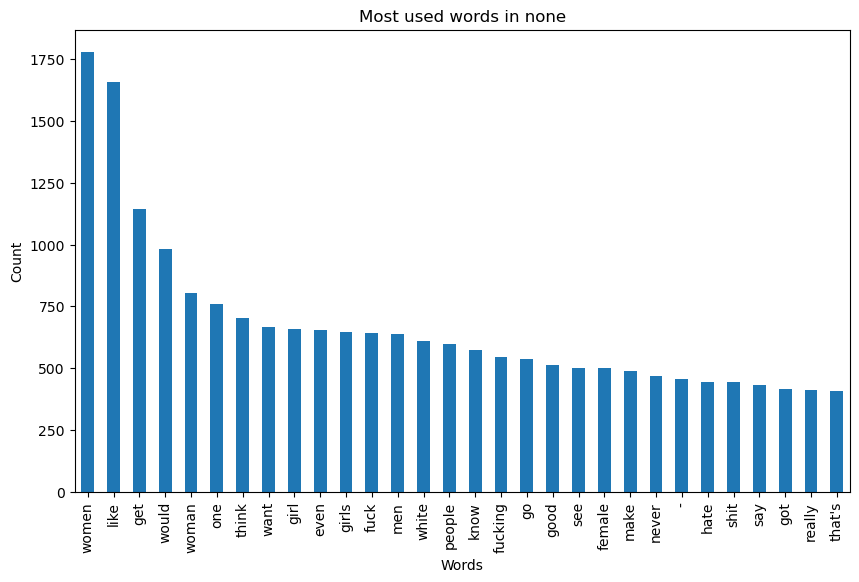

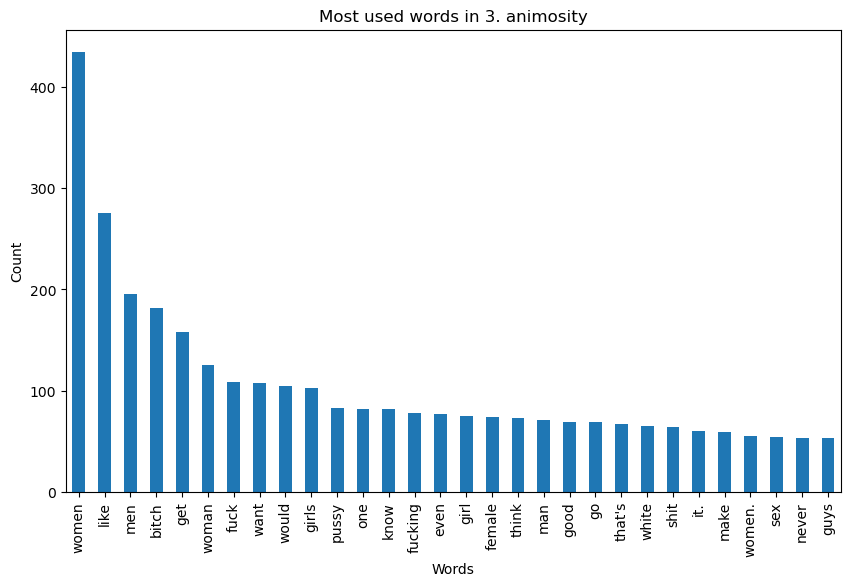

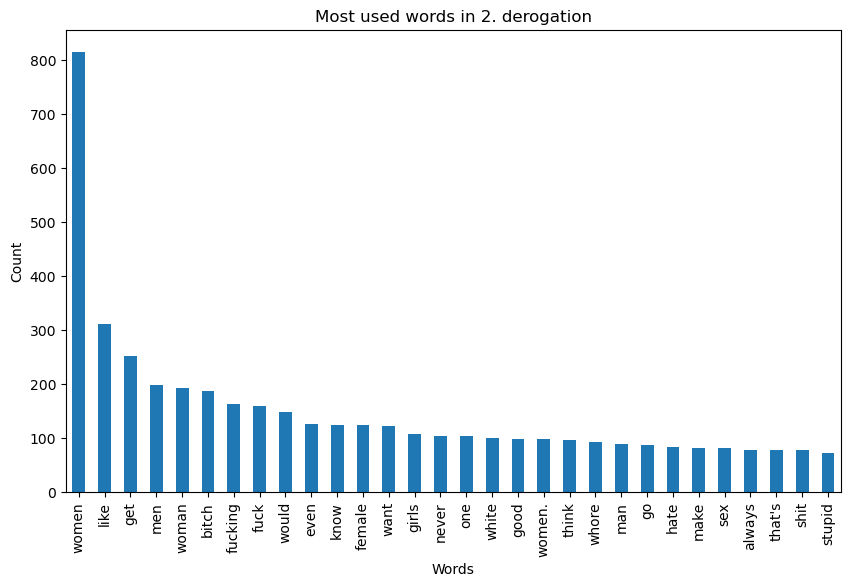

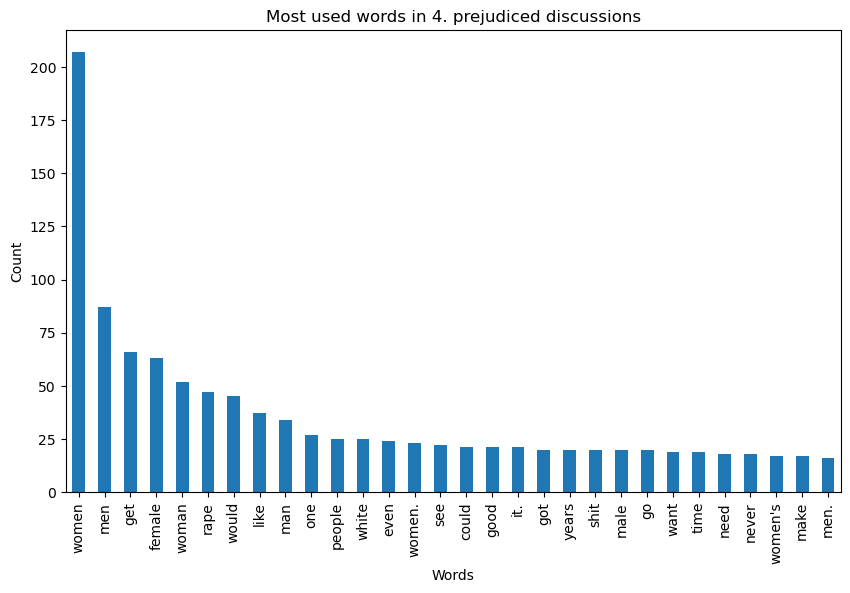

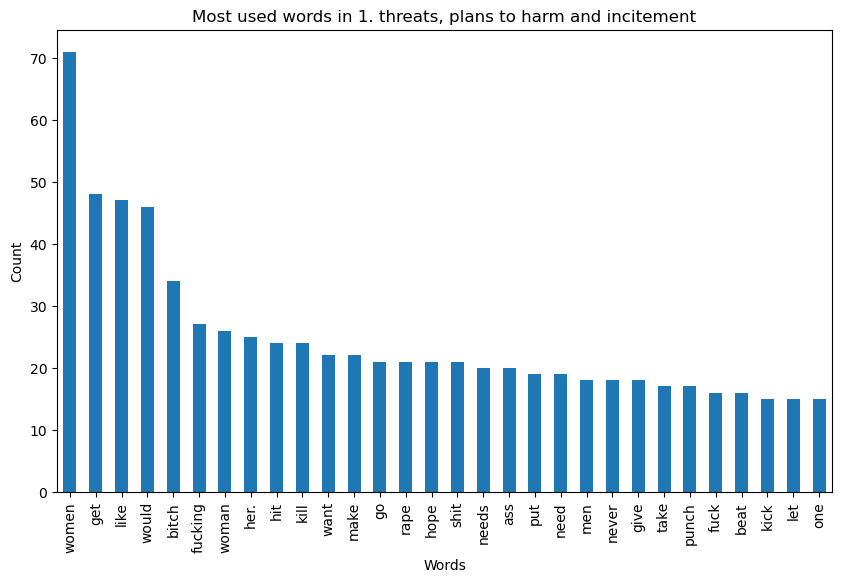

In [26]:
#help me make barcharts of most used words per label_category
for category in df1['label_category'].unique():
    words = df1[df1['label_category'] == category]['text'].apply(lambda x: x.split()).explode().value_counts().head(30)

    words.plot(kind='bar', figsize=(10,6))
    plt.title(f'Most used words in {category}')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.show()

## DF 2

<Axes: xlabel='annotator'>

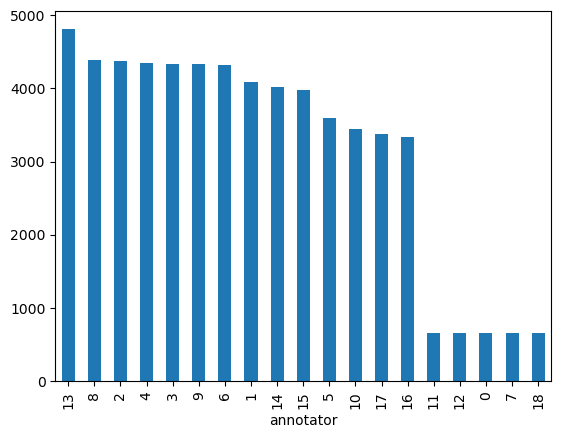

In [27]:
df2['annotator'].value_counts()
df2['annotator'].value_counts().plot(kind='bar')

In [28]:
#give me 5 examples of text per label_category
df2.groupby('label_category').apply(lambda x: x.sample(n=5))[['label_category','text']].reset_index(drop=True)



/var/folders/0z/4yrpt4m15ps8kzs2ljkgk40r0000gn/T/ipykernel_9263/273652304.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2.groupby('label_category').apply(lambda x: x.sample(n=5))[['label_category','text']].reset_index(drop=True)


,label_category,text
0,"1. threats, plans to harm and incitement",I personally would have hit that bitch and she...
1,"1. threats, plans to harm and incitement",There should be a cost to those who purposely ...
2,"1. threats, plans to harm and incitement","Someone should take her head, put it inside th..."
3,"1. threats, plans to harm and incitement",This woman needs a rope around her neck
4,"1. threats, plans to harm and incitement",well if i was there she wouldn't be able to ta...
5,2. derogation,"""Look at her eyes staring back at you. What yo..."
6,2. derogation,god please make her go away evil bitch
7,2. derogation,Hard of hearing chicks are nice... Granted I'm...
8,2. derogation,"I just act friendly, but don't actively pursue..."
9,2. derogation,If a girl jumps on me like she's grinding me f...


In [29]:
# different values of label_vector
print(df2.label_vector.unique())

['2.2 aggressive and emotive attacks' 'none'
 '2.3 dehumanising attacks & overt sexual objectification'
 '2.1 descriptive attacks'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '3.3 backhanded gendered compliments'
 '3.2 immutable gender differences and gender stereotypes'
 '4.2 supporting systemic discrimination against women as a group'
 '1.2 incitement and encouragement of harm' '1.1 threats of harm'
 '3.4 condescending explanations or unwelcome advice'
 '4.1 supporting mistreatment of individual women']


In [30]:
#table the values of label_vector
print(df2.label_vector.value_counts())



label_vector
none                                                               44670
2.1 descriptive attacks                                             3665
2.2 aggressive and emotive attacks                                  2732
3.1 casual use of gendered slurs, profanities, and insults          2671
3.2 immutable gender differences and gender stereotypes             1506
2.3 dehumanising attacks & overt sexual objectification             1161
4.2 supporting systemic discrimination against women as a group     1094
1.2 incitement and encouragement of harm                             966
4.1 supporting mistreatment of individual women                      515
3.4 condescending explanations or unwelcome advice                   431
3.3 backhanded gendered compliments                                  301
1.1 threats of harm                                                  288
Name: count, dtype: int64


In [31]:
df1.groupby(['label_category','label_vector']).apply(lambda x: x.sample(n=5))[['label_category','label_vector','text']].reset_index(drop=True)



/var/folders/0z/4yrpt4m15ps8kzs2ljkgk40r0000gn/T/ipykernel_9263/872712867.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1.groupby(['label_category','label_vector']).apply(lambda x: x.sample(n=5))[['label_category','label_vector','text']].reset_index(drop=True)


,label_category,label_vector,text
0,"1. threats, plans to harm and incitement",1.1 threats of harm,want kill her..... habit drinking multiple pep...
1,"1. threats, plans to harm and incitement",1.1 threats of harm,care care. tries break house shoot her. dead.
2,"1. threats, plans to harm and incitement",1.1 threats of harm,tell cunt come house take herself. need gun pl...
3,"1. threats, plans to harm and incitement",1.1 threats of harm,pissed much. makes want seek bitch punch there...
4,"1. threats, plans to harm and incitement",1.1 threats of harm,make life supporter's lives living hell... aww...
5,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm,milllie tibbetts got deserved. glad dead.
6,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm,"look 4 another job, case, matbe day u bust lip..."
7,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm,wish girlfriend named alexa force stuff
8,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm,looool dad cuck btw fuck mom dude whore mom le...
9,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm,nobody except diehard pussy hat partisan sycop...


In [32]:
#distribuition of number of words per text
print(df2['text'].apply(lambda x: len(x.split())).describe())


count    60000.00000
mean        23.30960
std         11.70963
min          1.00000
25%         14.00000
50%         22.00000
75%         32.00000
max         58.00000
Name: text, dtype: float64


Axes(0.125,0.11;0.775x0.77)


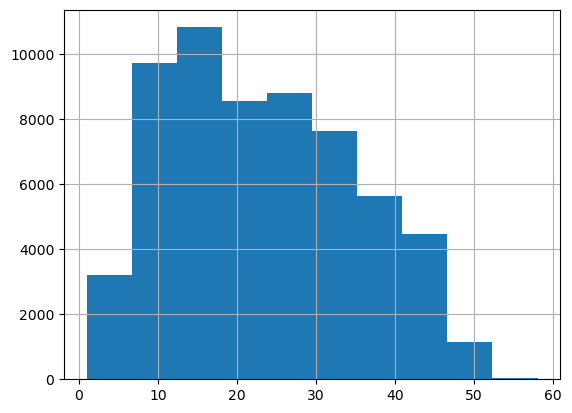

In [33]:
#graph distribuition of number of words per text
print(df2['text'].apply(lambda x: len(x.split())).hist())




In [34]:
#make all words lowercase in the text column
df2['text'] = df2['text'].str.lower()

In [35]:
#help me remove stop words from the text column
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df2['text'] = df2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))



In [36]:
remove = ['The','[URL]','[url]','[user]']

In [37]:
    #remove words in the remove list from the text column

df2['text'] = df2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in remove]))
df2['text'] = df2['text'].str.replace(r'[^\w\s]','')


<Axes: xlabel='text'>

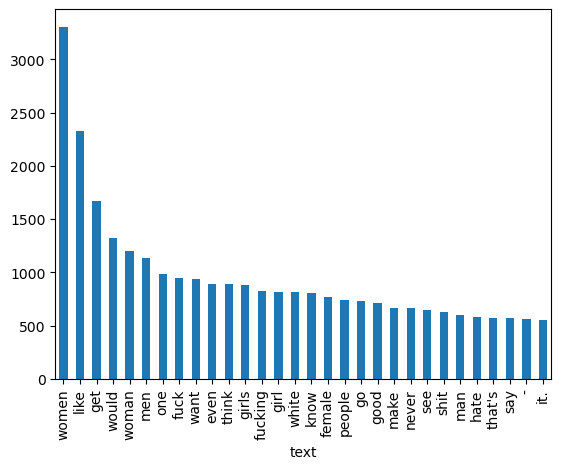

In [38]:
#What are the most used words in the text column, make a word cloud
words = df1['text'].apply(lambda x: x.split()).explode().value_counts().head(30)

words.plot(kind='bar')

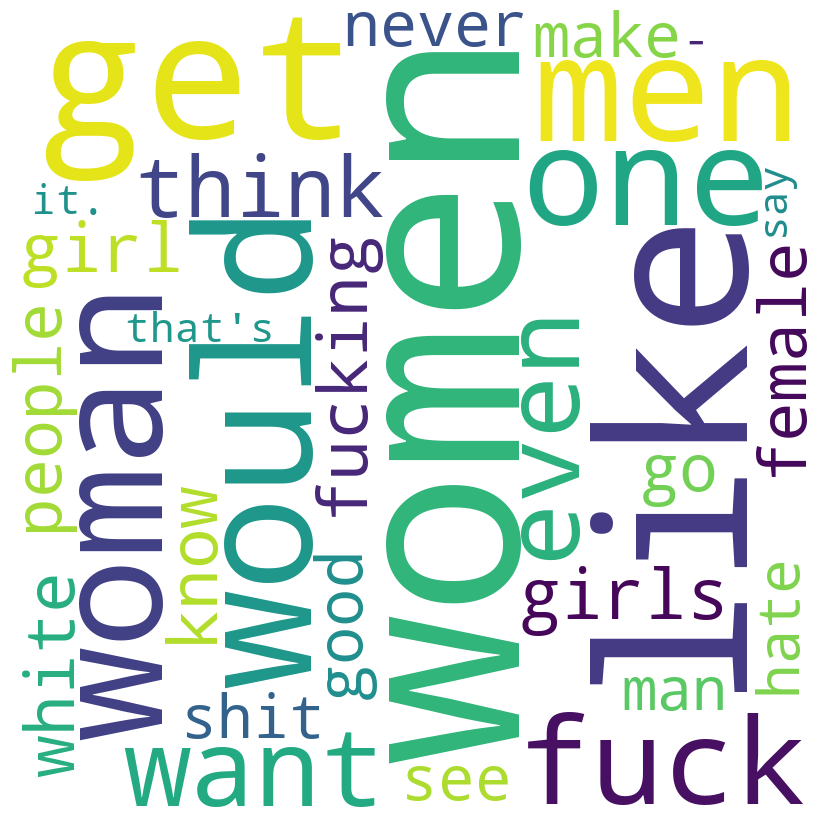

In [39]:
#make a wordcloud of the words pandas series
words = df2['text'].apply(lambda x: x.split()).explode().value_counts().head(30)

wordcloud = WordCloud(width = 800, height = 800, background_color='white').generate_from_frequencies(words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



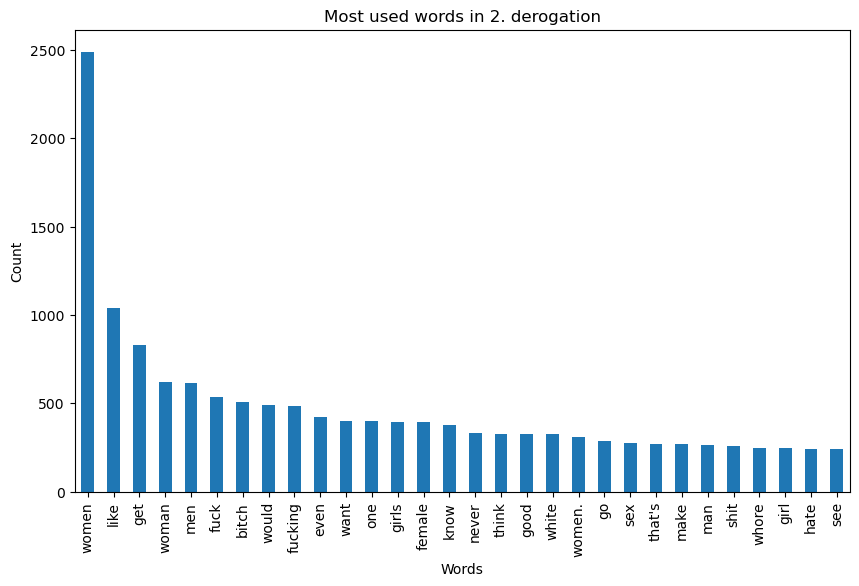

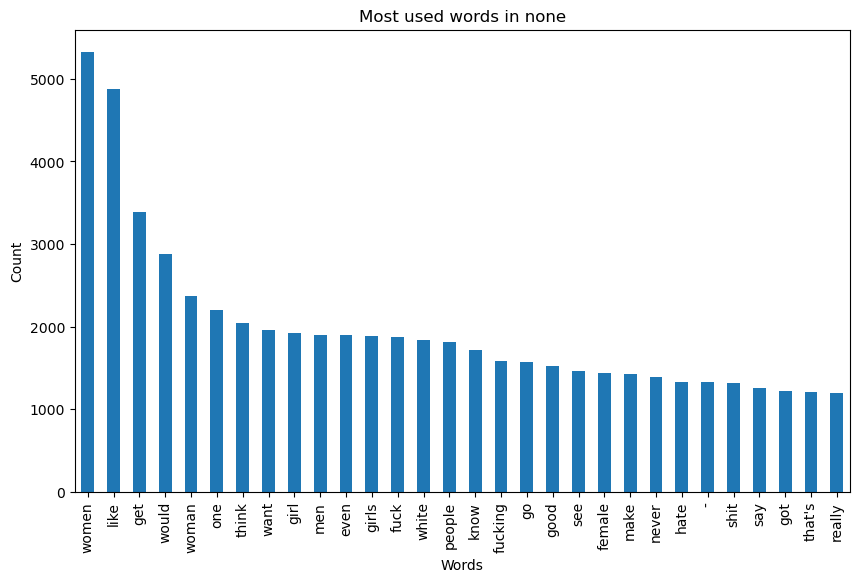

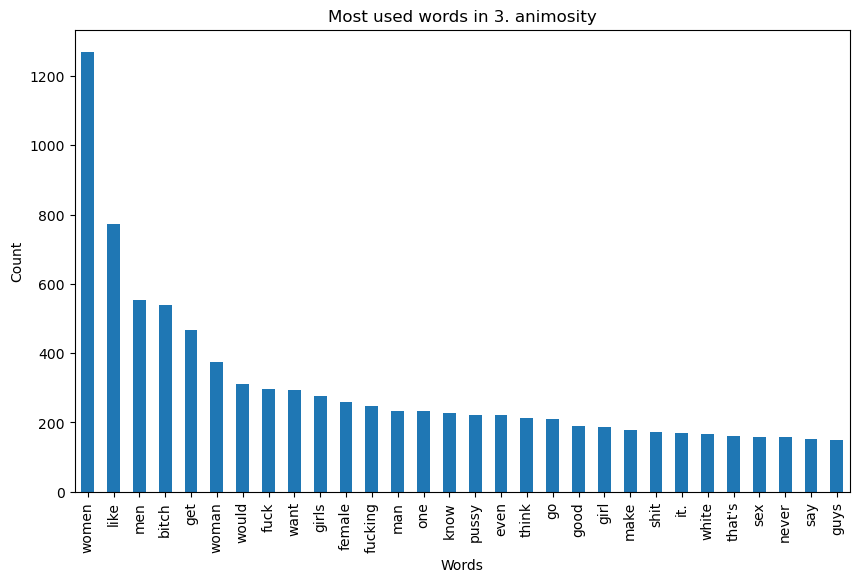

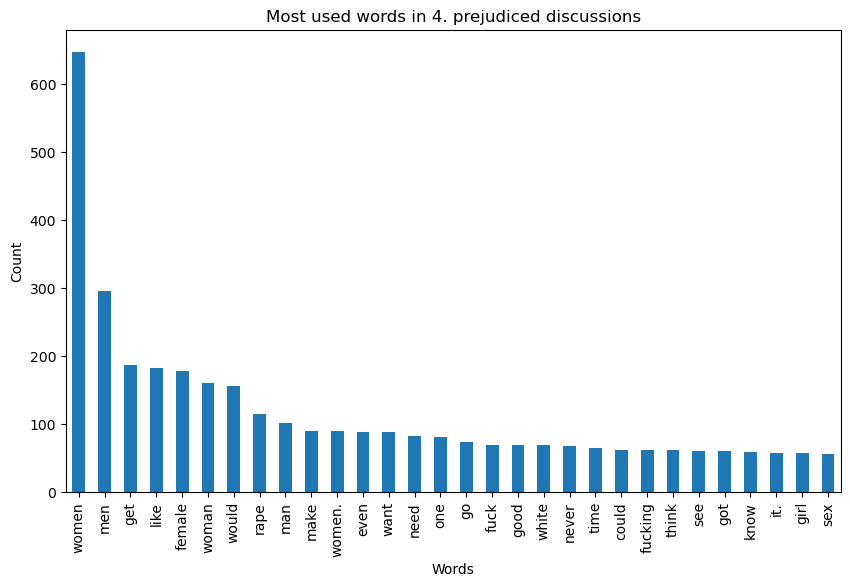

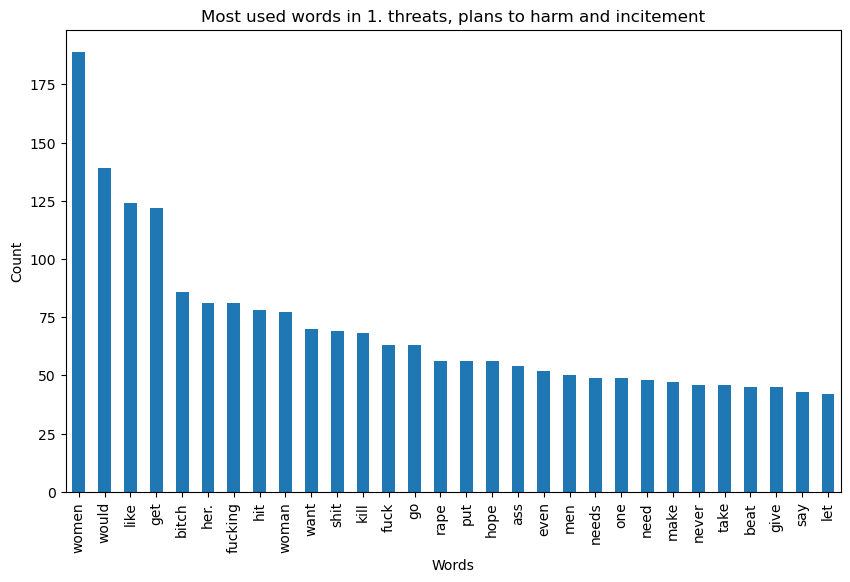

In [40]:
#help me make barcharts of most used words per label_category
for category in df2['label_category'].unique():
    words = df2[df2['label_category'] == category]['text'].apply(lambda x: x.split()).explode().value_counts().head(30)

    words.plot(kind='bar', figsize=(10,6))
    plt.title(f'Most used words in {category}')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.show()